
# 📊 Predictive Model & Financial ROI Analysis for Innovation Woman

This notebook estimates potential student subscriptions and calculates financial justification (ROI) for implementing the Higher-Level Education Ambassadors (HLEA) Program in Boston-area universities.

We use:
- Historical subscription and churn data
- University population estimates
- Event engagement data
- Ambassador conversion benchmarks


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [2]:
# Load datasets
subscriptions_active = pd.read_excel("subscriptions (1) - only active.xlsx")
subscriptions_cancelled = pd.read_excel("subscriptions (1) - Cancellations Requested.xlsx")
student_pop = pd.read_excel("Student Population in Massachusetts.xlsx")
event_attendance = pd.read_excel("Average student event attendance rates.xlsx")
ambassador_metrics = pd.read_excel("Ambassador Program Comparative Metrics for Financial Justification.xlsx")

In [50]:
# Analyze subscription KPIs
active_revenue = subscriptions_active['Amount'].sum()
cancelled_count = subscriptions_cancelled.shape[0]
total_active = subscriptions_active.shape[0]
churn_rate = cancelled_count / (cancelled_count + total_active)

print(f"Total Active Subscriptions: {total_active}")
print(f"Estimated Annual Revenue (active users): ${active_revenue}")
print(f"Churn Rate Estimate: {churn_rate:.2%}")

Total Active Subscriptions: 2637
Estimated Annual Revenue (active users): $337782
Churn Rate Estimate: 5.72%



## 🎓 5-Year ROI Forecast for Innovation Woman Ambassador Program

This analysis calculates the year-by-year ROI of the Innovation Woman Higher-Level Education Ambassadors Program using updated assumptions:

- **Target number of new subscribers by ambassador**: 21
- **Annual subscription fee**: $120

- **overhead per university per year**: $200
- **Universities grow from 5 → 10 → 15 → 20 over 4 years**
- **No carry-over of subscribers from previous years** (each cohort is new)

In [45]:
# Forecast calculation
years = 5
universities_by_year = [5, 10, 15, 20, 20]
conversion_per_uni_per_year = 21
annual_fee = 120
overhead_per_uni = 200

# Metrics
new_subscribers = []
revenue_per_year = []
costs = []
profits = []
roi_by_year = []

for year in range(years):
    unis = universities_by_year[year]
    students = unis * conversion_per_uni_per_year
    revenue = students * annual_fee
    cost = unis * overhead_per_uni
    profit = revenue - cost
    roi = (revenue - cost) / cost if cost else 0

    new_subscribers.append(students)
    revenue_per_year.append(revenue)
    costs.append(cost)
    profits.append(profit)
    roi_by_year.append(roi)

# Create DataFrame
forecast_df = pd.DataFrame({
    'Year': range(1, years + 1),
    'Universities': universities_by_year,
    'Estimated Students Converted': new_subscribers,
    'Total Revenue': revenue_per_year,
    'Total Cost': costs,
    'Net Profit': profits,
    'Estimated ROI': [f"{r*100:.2f}%" for r in roi_by_year]
})

forecast_df

,Year,Universities,Estimated Students Converted,Total Revenue,Total Cost,Net Profit,Estimated ROI
0,1,5,105,12600,1000,11600,1160.00%
1,2,10,210,25200,2000,23200,1160.00%
2,3,15,315,37800,3000,34800,1160.00%
3,4,20,420,50400,4000,46400,1160.00%
4,5,20,420,50400,4000,46400,1160.00%


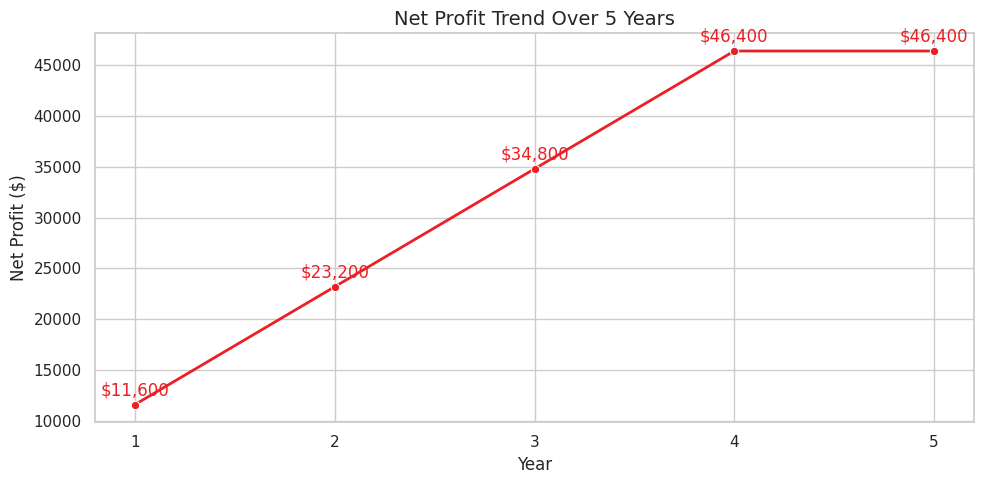

In [46]:
# Net Profit Line Chart Over 5 Years
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=forecast_df['Year'], y=forecast_df['Net Profit'], marker='o', linewidth=2, color='#eb2026')
plt.title('Net Profit Trend Over 5 Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Net Profit ($)')
plt.xticks(forecast_df['Year'])

for i, value in enumerate(forecast_df['Net Profit']):
    ax.text(forecast_df['Year'][i], value + 500, f"${value:,.0f}", ha='center', va='bottom', color='#eb2026')

plt.tight_layout()
plt.show()

## 🎓 5-Year ROI Forecast for Innovation Woman Ambassador Program - Considering after graduate subscription with 50% retention

In [47]:
# Reset parameters
years = 5
universities_by_year = [5, 10, 15, 20, 20]
conversion_per_uni_per_year = 21
annual_fee = 120
retention_rate = 0.60
renewal_fee = 159
overhead_per_uni = 200

# Reset tracking
cohort_subscribers = {}

new_students = []
returning_subs_flat = []
revenue_total_flat = []
costs_flat = []
profits_flat = []
roi_retention_flat = []

for year in range(1, years + 1):
    unis = universities_by_year[year - 1]
    new_subs = unis * conversion_per_uni_per_year
    cohort_subscribers[year] = new_subs

    revenue = new_subs * annual_fee
    returning_total = 0

    for past_year in range(1, year):
        if (year - past_year) <= 3:
            retained_once = int(cohort_subscribers[past_year] * retention_rate)
            revenue += retained_once * renewal_fee
            returning_total += retained_once

    cost = unis * overhead_per_uni
    profit = revenue - cost
    roi = (profit / cost) if cost else 0

    new_students.append(new_subs)
    returning_subs_flat.append(returning_total)
    revenue_total_flat.append(revenue)
    costs_flat.append(cost)
    profits_flat.append(profit)
    roi_retention_flat.append(roi)

# Create DataFrame
flat_retention_df = pd.DataFrame({
    'Year': range(1, years + 1),
    'Universities': universities_by_year,
    'New Subscribers': new_students,
    'Returning Subscribers (Flat)': returning_subs_flat,
    'Revenue (Flat Retention)': revenue_total_flat,
    'Total Cost': costs_flat,
    'Net Profit': profits_flat,
    'ROI (Annual)': [f"{r*100:.2f}%" for r in roi_retention_flat]
})

flat_retention_df

,Year,Universities,New Subscribers,Returning Subscribers (Flat),Revenue (Flat Retention),Total Cost,Net Profit,ROI (Annual)
0,1,5,105,0,12600,1000,11600,1160.00%
1,2,10,210,63,35217,2000,33217,1660.85%
2,3,15,315,189,67851,3000,64851,2161.70%
3,4,20,420,378,110502,4000,106502,2662.55%
4,5,20,420,567,140553,4000,136553,3413.82%


<ipython-input-48-c4d1d3ee353a>:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


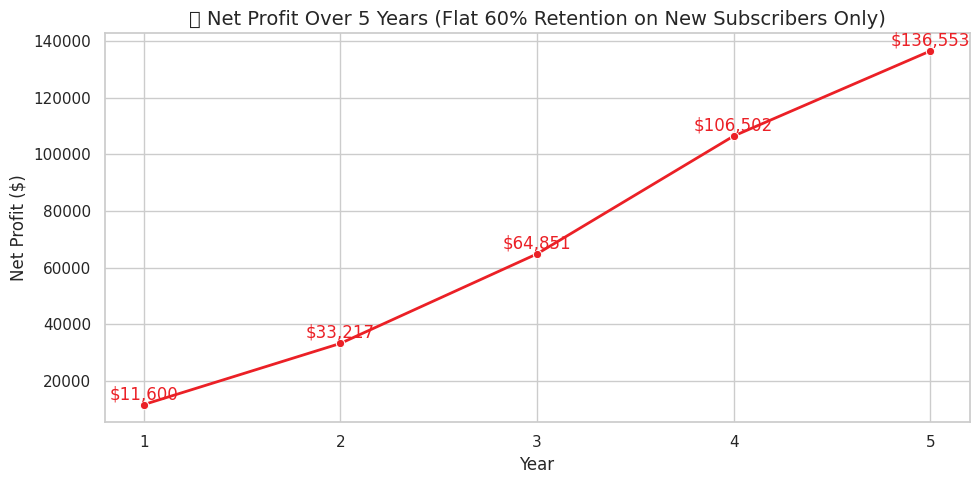

In [48]:
# Net Profit Chart for Flat Retention
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x=flat_retention_df['Year'], y=flat_retention_df['Net Profit'], marker='o', linewidth=2, color='#eb2026')
plt.title('Net Profit Over 5 Years (Flat 60% Retention on New Subscribers Only)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Net Profit ($)')
plt.xticks(flat_retention_df['Year'])

for i, value in enumerate(flat_retention_df['Net Profit']):
    ax.text(flat_retention_df['Year'][i], value + 500, f"${value:,.0f}", ha='center', va='bottom', color='#eb2026')

plt.tight_layout()
plt.show()

<ipython-input-49-1c1f09e0272f>:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


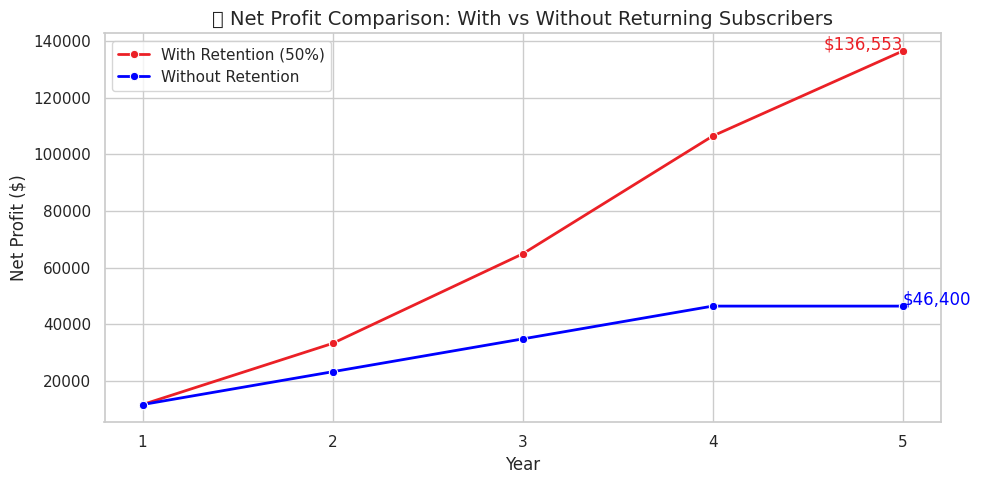

In [49]:
# Comparison Chart: With vs Without Returning Subscribers
plt.figure(figsize=(10, 5))

# Line for flat retention model (with returning subs)
sns.lineplot(x=flat_retention_df['Year'], y=flat_retention_df['Net Profit'],
             marker='o', linewidth=2, color='#eb2026', label='With Retention (50%)')

# Line for non-retention model
sns.lineplot(x=forecast_df['Year'], y=forecast_df['Net Profit'],
             marker='o', linewidth=2, color='blue', label='Without Retention')

plt.title('Net Profit Comparison: With vs Without Returning Subscribers', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Net Profit ($)')
plt.xticks(flat_retention_df['Year'])

# Add labels to the last point on each line
plt.text(flat_retention_df['Year'].iloc[-1], flat_retention_df['Net Profit'].iloc[-1] + 500,
         f"${flat_retention_df['Net Profit'].iloc[-1]:,.0f}", color='#eb2026', ha='right')
plt.text(forecast_df['Year'].iloc[-1], forecast_df['Net Profit'].iloc[-1] + 500,
         f"${forecast_df['Net Profit'].iloc[-1]:,.0f}", color='blue', ha='left')

plt.legend()
plt.tight_layout()
plt.show()